## **ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Í∞ÄÏ†∏Ïò§Í∏∞**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False

#### **Í¥ÄÎ†® UtilÌï®Ïàò Ï†ïÏùò**
‚Äª Refernce sites <br>
  https://towardsdatascience.com/a-practical-guide-to-linear-regression-3b1cb9e501a6 <br>
  https://teddylee777.github.io/scikit-learn/scikit-learn-linear-with-regularizations <br>
  https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0 <br>
  https://medium.datadriveninvestor.com/basics-of-linear-regression-9b529aeaa0a5

In [2]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎπÑÍµêÌïòÎäî ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò
def plot_predictions(name_, pred, actual):

    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


# ÏÉàÎ°úÏö¥ Î™®Îç∏Ïùò ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ Î∞õÏïÑ MSEÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïù¥Î•º my_predictions ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò
def add_model(name_, pred, actual):

    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse


# ÌòÑÏû¨ my_predictions ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•Îêú Î™®Îì† Î™®Îç∏Ïùò MSE Í∞íÏùÑ Î∞îÌÉïÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
def plot_all():

    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()


# ÌîºÏ≤ò Ï§ëÏöîÎèÑ(ÎòêÎäî ÌöåÍ∑Ä Í≥ÑÏàò)Î•º Î∞îÌÉïÏúºÎ°ú Í∞ÄÎ°úÌòï ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò 
def plot_coef(columns, coef):

    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [3]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎπÑÍµêÌïòÎäî ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò
def plot_predictions2(name_, pred, actual):

    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


# ÏÉàÎ°úÏö¥ Î™®Îç∏Ïùò ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ Î∞õÏïÑ MSEÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïù¥Î•º my_predictions ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò
def add_model2(name_, pred, actual):

    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse


# ÌòÑÏû¨ my_predictions ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•Îêú Î™®Îì† Î™®Îç∏Ïùò MSE Í∞íÏùÑ Î∞îÌÉïÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
def plot_all2():

    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions2(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()



# <img src="../images/emergency.png" width="40" height="40"> **ÏΩîÎìú Ïã§Ïäµ ÏãúÍ∞Ñ - Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù** 

### **1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

In [ ]:
# Boston Housing Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

data_test = pd.read_csv('../data/Boston_Housing.csv')  
# Boston_Housing.csv ÌååÏùºÏùÑ Pandas DataFrameÏúºÎ°ú Î∂àÎü¨Ïò¥

print("\nÎç∞Ïù¥ÌÑ∞ ÏÖãÏùò ÏùºÎ∂ÄÎ•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.")  
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÉÅÏúÑ Î™á Í∞ú ÌñâÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•
data_test.head()  # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÏúÑ 5Í∞ú Ìñâ Ï∂úÎ†•


Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò ÏùºÎ∂ÄÎ•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.


CRIM    ZN  INDUS  CHAS    NOX     RM  AGE      DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

<html>
    <b><font size=4>* Î≥ÄÏàòÏóê ÎåÄÌïú ÏÑ§Î™Ö</font></b><br><br>
- CRIM: Î≤îÏ£ÑÏú®<br>
- ZN: 25,000 ÌèâÎ∞© ÌîºÌä∏ Îãπ Ï£ºÍ±∞Ïö© ÌÜ†ÏßÄÏùò ÎπÑÏú®<br>
- INDUS: ÎπÑÏÜåÎß§(non-retail) ÎπÑÏ¶àÎãàÏä§ Î©¥Ï†Å ÎπÑÏú®<br>
- CHAS: Ï∞∞Ïä§ Í∞ï ÎçîÎØ∏ Î≥ÄÏàò (ÌÜµÎ°úÍ∞Ä ÌïòÏ≤úÏùÑ Ìñ•ÌïòÎ©¥ 1; Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ 0)<br>
- NOX: ÏÇ∞Ìôî ÏßàÏÜå ÎÜçÎèÑ (Ï≤úÎßå Î∂ÑÏùò 1)<br>
- RM:Ï£ºÍ±∞ Îãπ ÌèâÍ∑† Í∞ùÏã§ Ïàò<br>
- AGE: 1940 ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú ÏûêÍ∞Ä ÏÜåÏú† Ï†êÏú† ÎπÑÏú®<br>
- DIS: 5 Í∞úÏùò Î≥¥Ïä§ÌÑ¥ Í≥†Ïö© ÏÑºÌÑ∞ÍπåÏßÄÏùò Í∞ÄÏ§ë Í±∞Î¶¨<br>
- RAD: Í≥†ÏÜçÎèÑÎ°ú Ï†ëÍ∑ºÏÑ± ÏßÄÏàò<br>
- TAX: 10,000 Îã¨Îü¨ Îãπ Ï†ÑÏ≤¥ Í∞ÄÏπò Ïû¨ÏÇ∞ ÏÑ∏Ïú®<br>
- PTRATIO ÎèÑÏãú Î≥Ñ ÌïôÏÉù-ÍµêÏÇ¨ ÎπÑÏú®<br>
- B: 1000 (Bk-0.63) ^ 2 Ïó¨Í∏∞ÏÑú BkÎäî ÎèÑÏãú Î≥Ñ Í≤ÄÏ†ï ÎπÑÏú®ÏûÖÎãàÎã§.<br>
- LSTAT: Ïù∏Íµ¨Ïùò ÎÇÆÏùÄ ÏßÄÏúÑ<br>
- target: ÏûêÍ∞Ä Ï£ºÌÉùÏùò Ï§ëÏïôÍ∞í (1,000 Îã¨Îü¨ Îã®ÏúÑ)<br>
</html>

### **2) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**
- Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
data_test.{___}

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ ÌôïÏù∏

In [ ]:
# Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µÏùÑ ÌôïÏù∏ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
data_test.{___}

np.int64(0)

- Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞

In [ ]:
# Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
data_test=data_test.{___}
data_test.{___}

### **3) Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨**

In [ ]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî. (ÎπÑÏú®ÏùÄ 80:20)
# ÏòàÏ∏° target Í∞íÏùÄ 'MEDV' Ïª¨Îüº ÏûÖÎãàÎã§.

X_test = {___}
y_test = {___}

X_train, X_test, y_train, y_test ={___}

print("\nÌïôÏäµ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞:", X_train.shape[0])
print("ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞:", X_test.shape[0])


ÌïôÏäµ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞: 404
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞: 102


### **4) Î™®Îç∏ Íµ¨Ï∂ï**

In [9]:
lm = sm.OLS(y_train, X_train)
results = lm.fit()

In [ ]:
# LinearRegressionÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

model = {___}
model.{___}

print("\nÎ™®Îç∏ Í≥ÑÏàò(Í∏∞Ïö∏Í∏∞):", model.coef_[0])
print("Î™®Îç∏ Ï†àÌé∏(yÏ†àÌé∏):", model.intercept_)


Î™®Îç∏ Í≥ÑÏàò(Í∏∞Ïö∏Í∏∞): -0.11944344700245772
Î™®Îç∏ Ï†àÌé∏(yÏ†àÌé∏): 38.091694926302296


### **5) Î™®Îç∏ ÏòàÏ∏° ÏàòÌñâ**

In [ ]:
# Î™®Îç∏ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

y_pred = {___}

### **6) Î™®Îç∏ ÌèâÍ∞Ä**
- MAE, MSE, R2 Í∞íÏùÑ ÎπÑÍµêÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞Ä

In [ ]:
# ÏúÑ 3Í∞ÄÏßÄÏùò ÌèâÍ∞ÄÏßÄÌëúÎ•º ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

mae = {___}
mse = {___}
r2 = {___}

print("\n[Î™®Îç∏ ÌèâÍ∞Ä ÏßÄÌëú]")
print("\n- ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞® (MAE):", mae)
print("- ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞® (MSE):", mse)
print("- R-Ï†úÍ≥± (R2) Í∞í:", r2)


[Î™®Îç∏ ÌèâÍ∞Ä ÏßÄÌëú]

- ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞® (MAE): 3.8429092204444983
- ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞® (MSE): 33.44897999767639
- R-Ï†úÍ≥± (R2) Í∞í: 0.5892223849182525


### **7) ÏÑ†ÌòïÏÑ± (Linearity)**
Ï¢ÖÏÜçÎ≥ÄÏàòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏÑ†Ìòï Ï°∞Ìï©ÏúºÎ°ú Ï∂îÏ†ïÌïúÎã§.

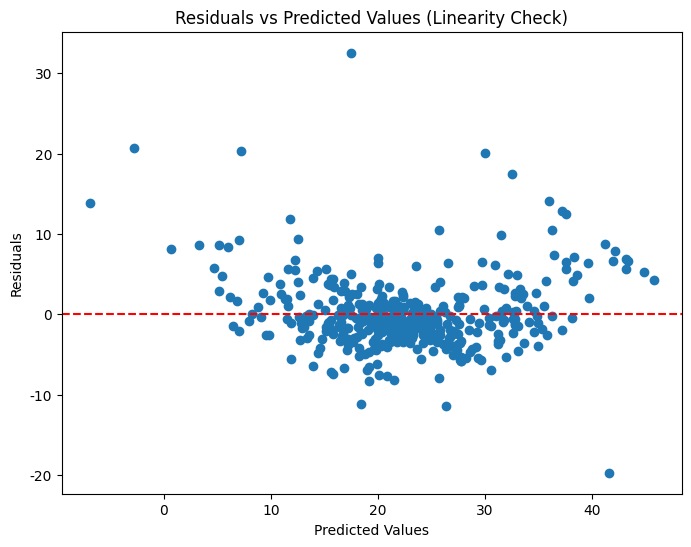

In [ ]:
plt.figure(figsize=(8, 6))

plt.{___}(results.fittedvalues, results.resid)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Linearity Check)')
plt.show()

### **8) Ï†ïÍ∑úÏÑ± ÌôïÏù∏**
Ïò§Ï∞®Ìï≠ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥Í≥† ÌèâÍ∑† 0Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§.

<Figure size 600x600 with 0 Axes>

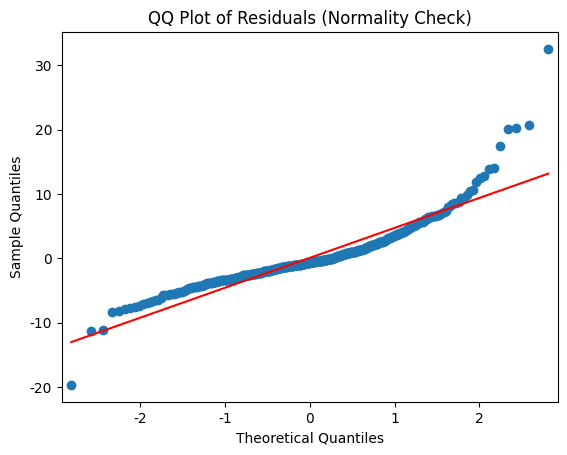

In [ ]:
plt.figure(figsize=(6, 6))

sm.{___}(results.resid, line='s')

plt.title('QQ Plot of Residuals (Normality Check)')
plt.show()

### **9) Îì±Î∂ÑÏÇ∞ÏÑ± (Equal Variance)**
Ïò§Ï∞®Ïùò Î∂ÑÏÇ∞ÏùÄ Îì±Î∂ÑÏÇ∞ ÏÜçÏÑ±ÏùÑ Í∞ñÎäîÎã§.

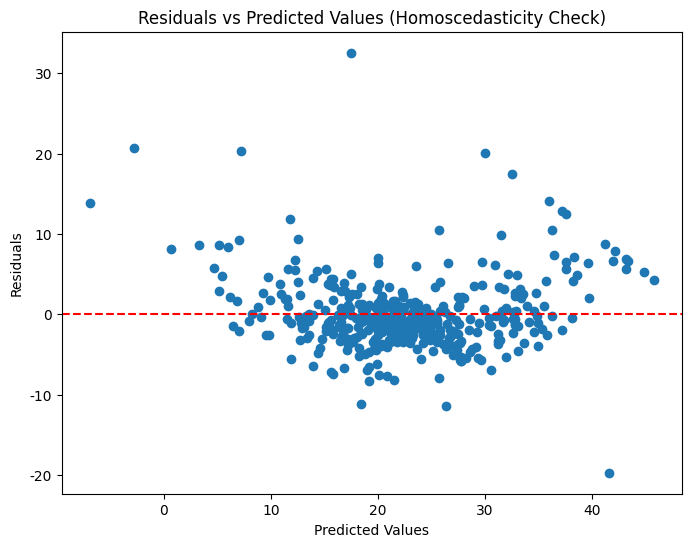

In [ ]:
plt.figure(figsize=(8, 6))

plt.{___}(results.fittedvalues, results.resid)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.show()


### **10) ÎèÖÎ¶ΩÏÑ± (Independence)**
Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàò(ÌôïÎ•†Î≥ÄÏàò)Îäî ÏÑúÎ°ú ÎèÖÎ¶Ω Í¥ÄÍ≥ÑÏù¥Îã§.

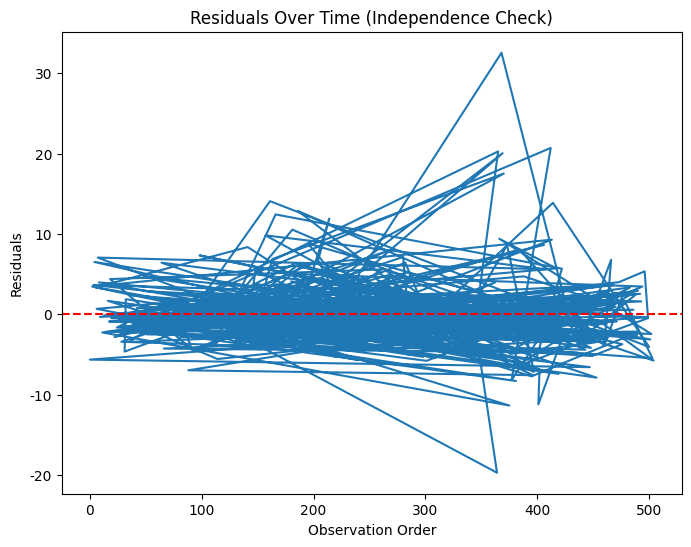

In [ ]:
plt.figure(figsize=(8, 6))

plt.{___}(results.resid)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals Over Time (Independence Check)')
plt.show()

#### <img src="../images/unlock.png" width="25" height="25"> <font color=gray> **ÌÄ¥Ï¶àÍ∞Ä Ï¢ÖÎ£åÎêòÏóàÏäµÎãàÎã§.** </font>  

***

# **7. Regularization (Ï†ïÍ∑úÌôî)** 

- **Ï†ïÏùò**
  - ÌïôÏäµÎ™®Îç∏Ïùò ÏùºÎ∞òÌôî Ïò§Î•òÎ•º Ï§ÑÏó¨ÏÑú Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÎäî Í∏∞Î≤ï
<br>
<br>
- **Î™©Ï†Å**
  - ÌïôÏäµÎ™®Îç∏ Íµ¨Ï∂ï Ïãú, ùú∑Ïùò ÌÅ¨Í∏∞Î•º ÌïôÏäµÌïòÎ©∞ ùú∑Í∞Ä Ïª§ÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÏûê.
<br>
<br>
<br>

**[Î≥ÄÏàòÏÑ†ÌÉù Í∏∞Î∞ò Ï†ïÍ∑úÌôî]** : Î™®Îç∏ ÌïôÏäµ Ï§ë Î∂àÌïÑÏöîÌïú Î≥ÄÏàòÎ•º ÏûêÎèôÏúºÎ°ú Ï†úÍ±∞ÌïòÍ±∞ÎÇò ÏÑ†ÌÉùÌïòÏó¨, Ï§ëÏöîÌïú Î≥ÄÏàòÎßå ÏÇ¨Ïö©ÌïòÎäî Í∏∞Î≤ï

## **7-1. Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï (Forward Selection)**

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: ÎèÖÎ¶Ω Î≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò(y) Ï†ïÏùò

X = data_test.drop('MEDV', axis=1)  
# ÎèÖÎ¶Ω Î≥ÄÏàò: 'MEDV' Ïó¥ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïó¥ÏùÑ ÏÇ¨Ïö©

y = data_test['MEDV']  
# Ï¢ÖÏÜç Î≥ÄÏàò: 'MEDV' Ïó¥ (ÏòàÏ∏° ÎåÄÏÉÅ)

In [ ]:
import matplotlib.pyplot as plt

# Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï (Forward Selection)Í≥º Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôîÎ•º Ìè¨Ìï®Ìïú Ìï®Ïàò
def forward_selection_with_visualization(X, y, significance_level=0.05):
    initial_features = []  # Î™®Îç∏Ïóê Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§
    remaining_features = list(X.columns)  # ÏÑ†ÌÉù Í∞ÄÎä• Î≥ÄÏàòÎì§
    selected_features = []  # ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§
    model_performance = []  # Î™®Îç∏ ÏÑ±Îä• Ï∂îÏ†Å (Ïòà: R^2 Í∞í Ï†ÄÏû•)

    while remaining_features:
        best_pval = float("inf")  # ÌòÑÏû¨ Í∞ÄÏû• ÎÇÆÏùÄ p-value Ï¥àÍ∏∞Ìôî
        best_feature = None  # ÏµúÏ†ÅÏùò Î≥ÄÏàò Ï¥àÍ∏∞Ìôî

        # ÎÇ®ÏïÑ ÏûàÎäî Î≥ÄÏàòÎì§ Ï§ë ÏµúÏ†ÅÏùò Î≥ÄÏàòÎ•º ÏÑ†ÌÉù
        for feature in remaining_features:
            X_subset = sm.add_constant(X[initial_features + [feature]])  # ÏÑ†ÌÉùÎêú Î≥ÄÏàò + ÏÉàÎ°úÏö¥ Î≥ÄÏàò
            model = sm.OLS(y, X_subset).fit()  # Î™®Îç∏ ÌïôÏäµ
            pval = model.pvalues[feature]  # ÏÉà Î≥ÄÏàòÏùò p-value ÌôïÏù∏
            if pval < best_pval and pval < significance_level:  # Ïú†ÏùòÏÑ± ÏàòÏ§Ä ÎπÑÍµê
                best_pval = pval
                best_feature = feature

        if best_feature:  # ÏµúÏ†ÅÏùò Î≥ÄÏàòÍ∞Ä Ï°¥Ïû¨ÌïòÎ©¥
            initial_features.append(best_feature)  # ÏÑ†ÌÉùÎêú Î≥ÄÏàò Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            remaining_features.remove(best_feature)  # ÌõÑÎ≥¥ Î≥ÄÏàò Î¶¨Ïä§Ìä∏ÏóêÏÑú Ï†úÍ±∞
            selected_features.append(best_feature)  # ÏµúÏ¢Ö ÏÑ†ÌÉù Î≥ÄÏàòÏóê Ï∂îÍ∞Ä

            # ÌòÑÏû¨ Î≥ÄÏàòÎ°ú Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
            X_subset = sm.add_constant(X[initial_features])  # ÌòÑÏû¨ Î≥ÄÏàòÎ°ú Î™®Îç∏ Íµ¨ÏÑ±
            model = sm.OLS(y, X_subset).fit()
            model_performance.append(model.rsquared)  # R^2 Í∞íÏùÑ Ï†ÄÏû•
        else:
            break  # ÏÑ†ÌÉù Í∞ÄÎä•Ìïú Î≥ÄÏàòÍ∞Ä ÏóÜÏúºÎ©¥ Ï¢ÖÎ£å

    return selected_features, model_performance

# Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï Ïã§Ìñâ Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
selected_features, model_performance = forward_selection_with_visualization(X, y)

print("Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï Ïù¥ÌõÑ ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§:", selected_features)
print("Ï†ÑÏßÑ ÏÑ†ÌÉùÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•:", model_performance)

# Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî (R^2 Í∞í)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(model_performance) + 1), model_performance, marker='o', linestyle='-', color='blue')
plt.title("Forward Selection: Model Performance (R¬≤)")
plt.xlabel("Number of Selected Features")
plt.ylabel("R¬≤ Value")
plt.xticks(range(1, len(model_performance) + 1))  # xÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï
plt.grid(True)
plt.show()

Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï Ïù¥ÌõÑ ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ : ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN', 'CRIM', 'RAD', 'TAX']
Ï†ÑÏßÑ ÏÑ†ÌÉùÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•: [np.float64(0.5441462975864799), np.float64(0.6385616062603404), np.float64(0.6786241601613111), np.float64(0.6903077016842538), np.float64(0.7080892893529662), np.float64(0.7157742117396082), np.float64(0.7221614025277103), np.float64(0.726607858739603), np.float64(0.7288250904754123), np.float64(0.734176779117103), np.float64(0.7405822802569575)]


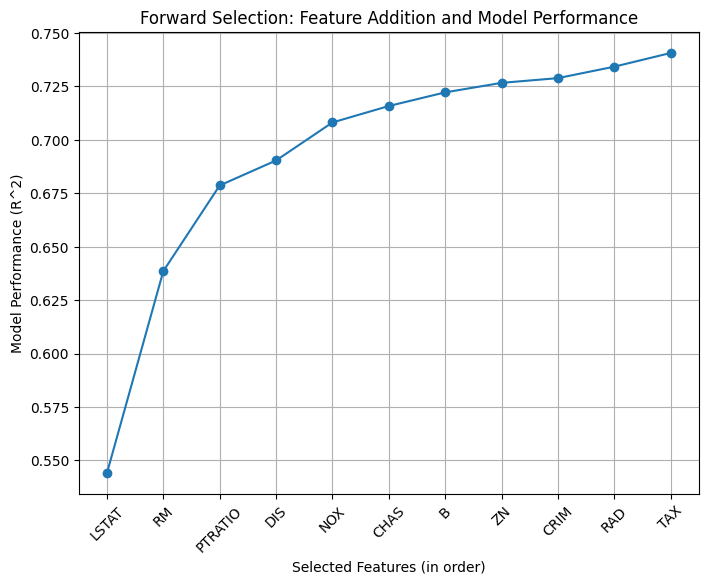

In [ ]:
# Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï Í≤∞Í≥º: Î™®Îç∏ ÏÑ±Îä•(R^2) ÏãúÍ∞ÅÌôî

plt.figure(figsize=(8, 6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Í∞ÄÎ°ú 8Ïù∏Ïπò, ÏÑ∏Î°ú 6Ïù∏ÏπòÎ°ú ÏÑ§Ï†ï
plt.plot(range(1, len(model_performance) + 1), model_performance, 
         marker='o', linestyle='-')  
# xÏ∂ï: ÏÑ†ÌÉùÎêú Î≥ÄÏàòÏùò ÏàúÏÑú
# yÏ∂ï: Í∞Å Îã®Í≥ÑÏóêÏÑúÏùò R^2 Í∞í (Î™®Îç∏ ÏÑ±Îä•)

plt.xticks(range(1, len(model_performance) + 1), selected_features, rotation=45)  
# xÏ∂ï ÎààÍ∏àÏùÑ ÏÑ†ÌÉùÎêú Î≥ÄÏàò Ïù¥Î¶ÑÏúºÎ°ú ÏÑ§Ï†ï, Í∞Å Î≥ÄÏàòÎ•º 45ÎèÑ ÌöåÏ†ÑÌï¥ ÌëúÏãú

plt.xlabel('Selected Features (in order)')  # xÏ∂ï ÎùºÎ≤®: ÏÑ†ÌÉùÎêú Î≥ÄÏàò ÏàúÏÑú
plt.ylabel('Model Performance (R^2)')  # yÏ∂ï ÎùºÎ≤®: Î™®Îç∏ ÏÑ±Îä• (R^2 Í∞í)
plt.title('Forward Selection: Feature Addition and Model Performance')  
# Í∑∏ÎûòÌîÑ Ï†úÎ™©: Î≥ÄÏàò Ï∂îÍ∞ÄÏôÄ Î™®Îç∏ ÏÑ±Îä•Ïùò Í¥ÄÍ≥Ñ

plt.grid()  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.show()  # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

## **7-2. ÌõÑÏßÑÏ†úÍ±∞Î≤ï (Backward Elimination)**

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ÌõÑÏßÑ ÏÜåÍ±∞Î≤ï (Backward Elimination) Íµ¨ÌòÑ Î∞è ÏÑ±Îä• ÏãúÍ∞ÅÌôî Ìè¨Ìï®
def backward_elimination_with_visualization(X, y, significance_level=0.05):
    features = list(X.columns)  # Ï¥àÍ∏∞ÏóêÎäî Î™®Îì† ÎèÖÎ¶Ω Î≥ÄÏàòÎ•º Ìè¨Ìï®
    model_performance = []  # Í∞Å Îã®Í≥ÑÏóêÏÑúÏùò Î™®Îç∏ ÏÑ±Îä• Í∏∞Î°ù (R¬≤)

    while len(features) > 0:
        # ÌòÑÏû¨ ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ°ú ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
        X_subset = sm.add_constant(X[features])  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
        model = sm.OLS(y, X_subset).fit()  # OLS ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©

        # Î™®Îç∏ ÏÑ±Îä•(R¬≤) Í∏∞Î°ù
        model_performance.append(model.rsquared)

        # Î≥ÄÏàòÏùò p-value Í≥ÑÏÇ∞
        pvalues = model.pvalues[1:]  # ÏÉÅÏàò(constant)Îäî Ï†úÏô∏
        max_pval = pvalues.max()  # p-value Ï§ë Í∞ÄÏû• ÌÅ∞ Í∞í ÌôïÏù∏

        if max_pval > significance_level:  # Í∞ÄÏû• ÌÅ∞ p-valueÍ∞Ä Ïú†Ïùò ÏàòÏ§ÄÏùÑ Ï¥àÍ≥ºÌïòÎ©¥
            excluded_feature = pvalues.idxmax()  # Ìï¥Îãπ Î≥ÄÏàò Ïù¥Î¶Ñ Ï∂îÏ∂ú
            features.remove(excluded_feature)  # Î≥ÄÏàò Ï†úÍ±∞
        else:
            break  # Î™®Îì† Î≥ÄÏàòÏùò p-valueÍ∞Ä Ïú†Ïùò ÏàòÏ§Ä Ïù¥ÌïòÏùº Í≤ΩÏö∞ Î∞òÎ≥µ Ï¢ÖÎ£å

    return features, model_performance

# ÌõÑÏßÑ ÏÜåÍ±∞Î≤ï Ïã§Ìñâ Î∞è Í≤∞Í≥º ÌôïÏù∏
selected_features_backward, model_performance_backward = backward_elimination_with_visualization(X, y)

print("ÌõÑÏßÑ Ï†úÍ±∞Î≤ï Ïù¥ÌõÑ ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§:", selected_features_backward)
print("ÌõÑÏßÑ Ï†úÍ±∞Ïóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•:", model_performance_backward)

# Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî (R¬≤ Í∞í)
plt.figure(figsize=(8, 6))
plt.plot(range(len(model_performance_backward)), model_performance_backward, 
         marker='o', linestyle='-', color='blue')
plt.title("Backward Elimination: Model Performance (R¬≤)")
plt.xlabel("Number of Remaining Features")
plt.ylabel("R¬≤ Value")
plt.grid(True)
plt.show()

ÌõÑÏßÑ Ï†úÍ±∞Î≤ï Ïù¥ÌõÑ ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ : ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
ÌõÑÏßÑ Ï†úÍ±∞Ïóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•: [np.float64(0.7406426641094095), np.float64(0.7406412165505144), np.float64(0.7405822802569574)]


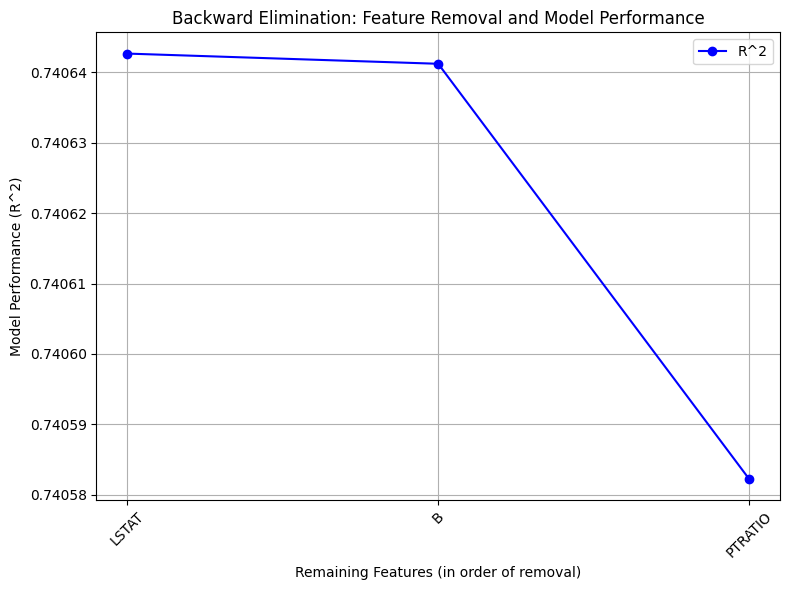

In [ ]:
# ÌõÑÏßÑ ÏÜåÍ±∞Î≤ï Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî (R¬≤ Í∞í)

plt.figure(figsize=(8, 6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

x_ticks = range(len(model_performance_backward))  # xÏ∂ï ÎààÍ∏à ÏúÑÏπò ÏÑ§Ï†ï

# Î™®Îç∏ ÏÑ±Îä• Í∑∏ÎûòÌîÑ
plt.plot(x_ticks, model_performance_backward, marker='o', linestyle='-', color='b', label='R^2')  
# xÏ∂ï: Îã®Í≥Ñ Î≤àÌò∏ (Î≥ÄÏàò Ï†úÍ±∞ ÏàúÏÑú)
# yÏ∂ï: Í∞Å Îã®Í≥ÑÏóêÏÑúÏùò R¬≤ Í∞í (Î™®Îç∏ ÏÑ±Îä•)

# xÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï (ÎÇ®ÏïÑÏûàÎäî Î≥ÄÏàò Ïù¥Î¶Ñ)
adjusted_features = selected_features_backward[::-1][:len(model_performance_backward)]  
# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ•º Ï†úÍ±∞ ÏàúÏÑúÎåÄÎ°ú Ïó≠Ïàú Ï†ïÎ†¨ÌïòÏó¨ xÏ∂ïÏóê ÌëúÏãú
plt.xticks(x_ticks, adjusted_features, rotation=45)  
# xÏ∂ï ÎààÍ∏àÏùÑ ÎÇ®ÏïÑÏûàÎäî Î≥ÄÏàò Ïù¥Î¶ÑÏúºÎ°ú ÏÑ§Ï†ï, 45ÎèÑ ÌöåÏ†Ñ

plt.xlabel('Remaining Features (in order of removal)')  # xÏ∂ï ÎùºÎ≤®: ÎÇ®ÏïÑÏûàÎäî Î≥ÄÏàò Ïù¥Î¶Ñ
plt.ylabel('Model Performance (R^2)')  # yÏ∂ï ÎùºÎ≤®: Î™®Îç∏ ÏÑ±Îä• (R¬≤ Í∞í)
plt.title('Backward Elimination: Feature Removal and Model Performance')  
# Í∑∏ÎûòÌîÑ Ï†úÎ™©: Î≥ÄÏàò Ï†úÍ±∞ÏôÄ Î™®Îç∏ ÏÑ±Îä•Ïùò Í¥ÄÍ≥Ñ

plt.legend()  # Î≤îÎ°Ä Ï∂îÍ∞Ä
plt.grid()  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()  # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

***


#### **[Shrinkage methods]** : ÌïôÏäµ Ïãú Í≥ÑÏàò(ùõΩ)Î•º ÏûëÍ≤å ÌïôÏäµÌïòÎèÑÎ°ù Ïú†ÎèÑ

  1. Ridge regression: Î≥ÄÏàò Í≥ÑÏàò(ùõΩ) Í∞íÏùò Ï†úÍ≥± Ìï©ÏùÑ Ï†úÌïú
  \begin{equation}
  \sum_{j=1}^{p} \beta_j^2 \tag{1}
  \end{equation}

  2. Lasso regression: Î≥ÄÏàò Í≥ÑÏàò(ùõΩ) Í∞íÏùò Ìï©ÏùÑ Ï†úÌïú
  \begin{equation}
  \sum_{j=1}^{p} |\beta_j| \tag{2}
  \end{equation}

  3. Elastic net regression: Ï†úÍ≥± Ìï©Í≥º Ìï©ÏùÑ Î™®Îëê Ï†úÌïú
  \begin{equation}
  \sum_{j=1}^{p} \beta_j^2 + \sum_{j=1}^{p} |\beta_j| \tag{3}
  \end{equation}

## **8-1. Ridge Regression**

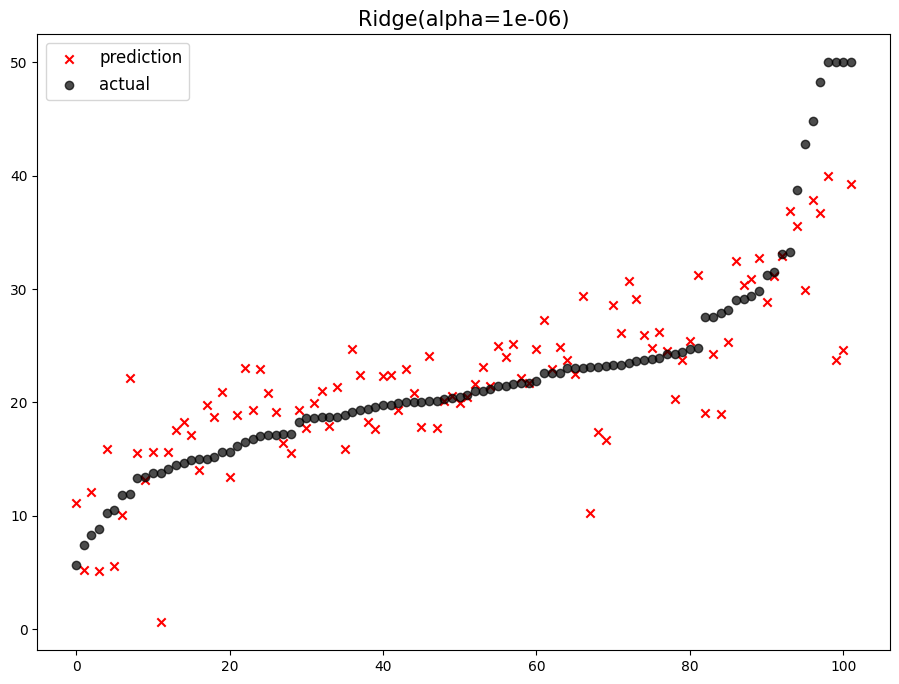

                 model        mse
0     Ridge(alpha=100)  37.512397
1      Ridge(alpha=10)  35.525132
2       Ridge(alpha=1)  34.231606
3     Ridge(alpha=0.1)  33.548488
4    Ridge(alpha=0.01)  33.459001
5   Ridge(alpha=0.001)  33.449982
6  Ridge(alpha=0.0001)  33.449080
7   Ridge(alpha=1e-06)  33.448981


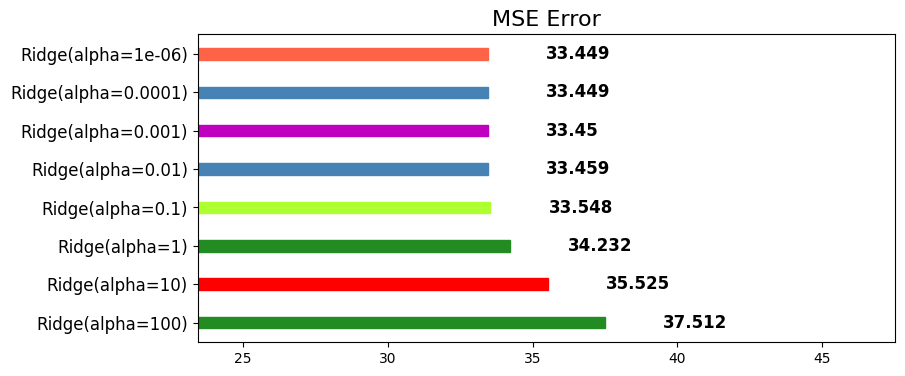

In [ ]:
from sklearn.linear_model import Ridge

# Ridge ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© (L2 Ï†ïÍ∑úÌôî)
# alpha Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ï†ïÍ∑úÌôî Í∞ïÎèÑÍ∞Ä Ïª§Ïßê (Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†• Ï¶ùÍ∞Ä)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # Îã§ÏñëÌïú alpha Í∞í ÏÑ§Ï†ï
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=331)  # Ridge Î™®Îç∏ Ï¥àÍ∏∞Ìôî, random_stateÎ°ú Ïû¨ÌòÑÏÑ± Î≥¥Ïû•
    ridge.fit(X_train, y_train)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌõàÎ†®
    pred_ridge = ridge.predict(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
    add_model('Ridge(alpha={})'.format(alpha), pred_ridge, y_test)  
    # add_modelÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ°ú, Î™®Îç∏ Ïù¥Î¶ÑÍ≥º ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•

# Î™®Îì† Î™®Îç∏Ïùò ÏÑ±Îä• ÎπÑÍµê Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plot_all()  # plot_allÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ°ú, Îã§ÏñëÌïú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏãúÍ∞ÅÌôî

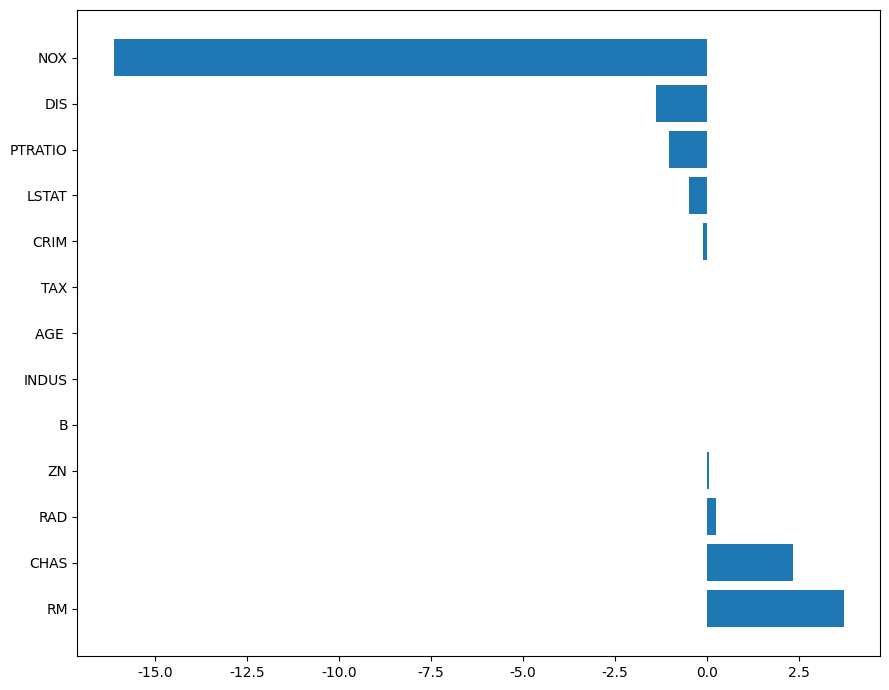

In [23]:
plot_coef(X_train.columns, ridge.coef_)

## **7-2. Lasso Regression**

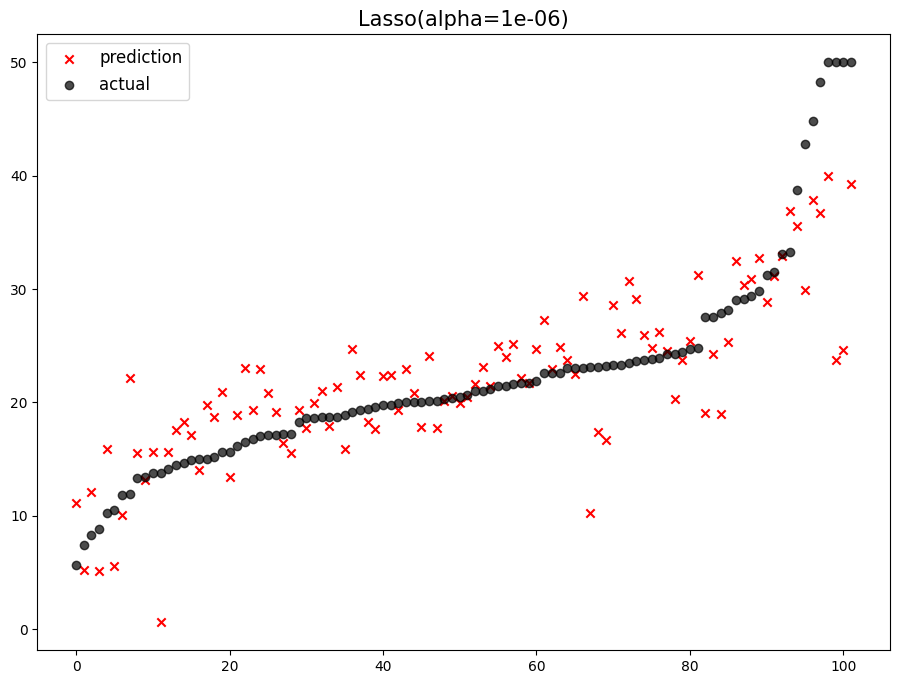

                  model        mse
0      Lasso(alpha=100)  75.806540
1       Lasso(alpha=10)  54.414927
2        Lasso(alpha=1)  41.700097
3      Ridge(alpha=100)  37.512397
4      Lasso(alpha=0.1)  36.074853
5       Ridge(alpha=10)  35.525132
6        Ridge(alpha=1)  34.231606
7     Lasso(alpha=0.01)  33.792934
8      Ridge(alpha=0.1)  33.548488
9    Lasso(alpha=0.001)  33.479018
10    Ridge(alpha=0.01)  33.459001
11  Lasso(alpha=0.0001)  33.451935
12   Ridge(alpha=0.001)  33.449982
13  Ridge(alpha=0.0001)  33.449080
14   Lasso(alpha=1e-06)  33.449009
15   Ridge(alpha=1e-06)  33.448981


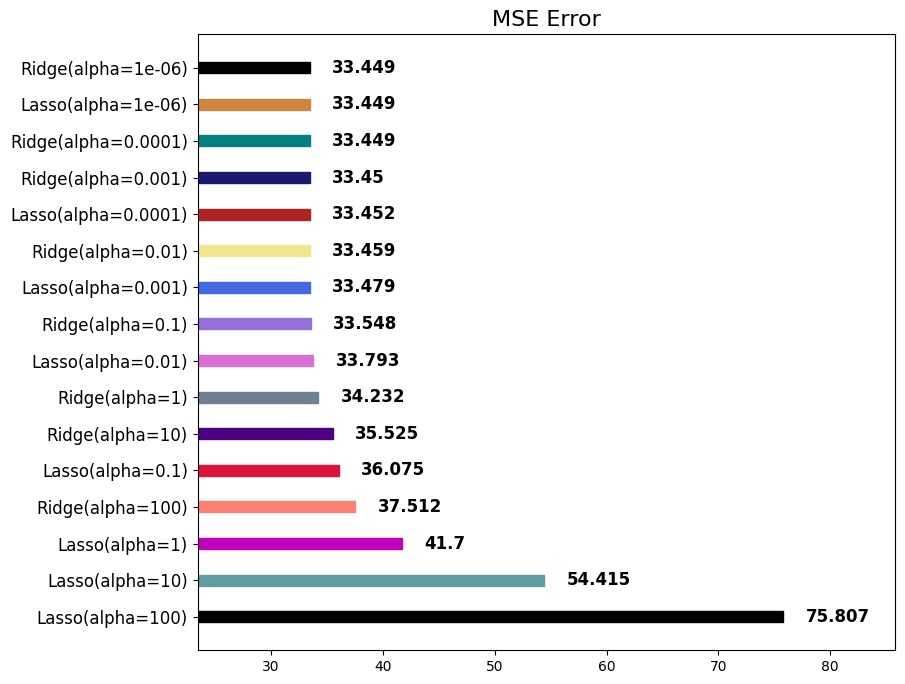

In [ ]:
from sklearn.linear_model import Lasso

# Lasso ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© (L1 Ï†ïÍ∑úÌôî)
# alpha Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ï†ïÍ∑úÌôî Í∞ïÎèÑÍ∞Ä Ïª§Ïßê (Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†• Ï¶ùÍ∞Ä)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # Îã§ÏñëÌïú alpha Í∞í ÏÑ§Ï†ï
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=111)  # Lasso Î™®Îç∏ Ï¥àÍ∏∞Ìôî, random_stateÎ°ú Ïû¨ÌòÑÏÑ± Î≥¥Ïû•
    lasso.fit(X_train, y_train)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌõàÎ†®
    pred_lasso = lasso.predict(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
    add_model('Lasso(alpha={})'.format(alpha), pred_lasso, y_test)  
    # add_modelÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ°ú, Î™®Îç∏ Ïù¥Î¶ÑÍ≥º ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•

# Î™®Îì† Î™®Îç∏Ïùò ÏÑ±Îä• ÎπÑÍµê Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plot_all()  # plot_allÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ°ú, Îã§ÏñëÌïú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏãúÍ∞ÅÌôî

## **7-3. Elasticnet Regression**

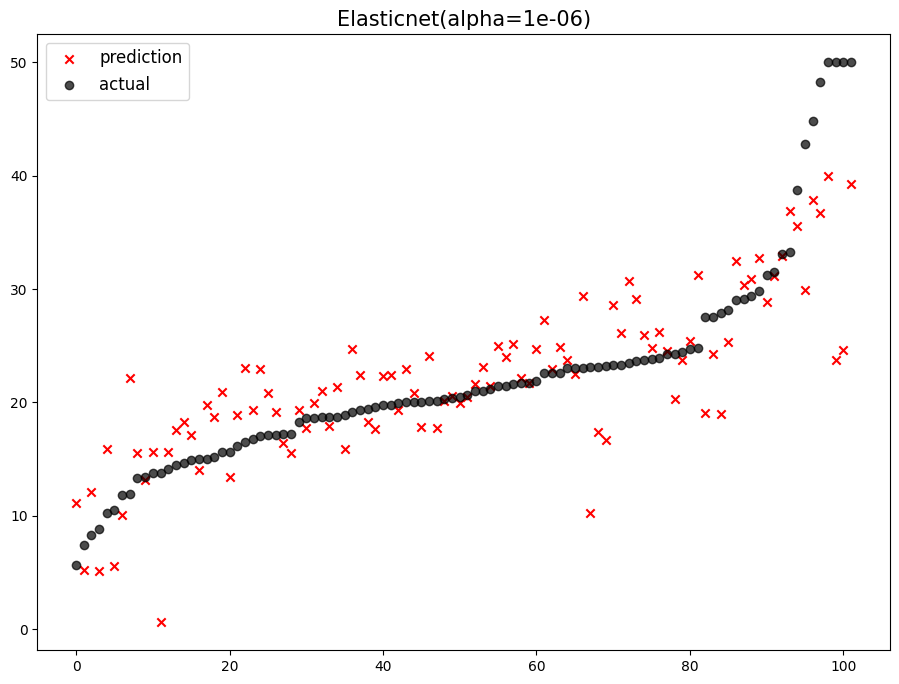

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1           Lasso(alpha=100)  75.806540
2            Lasso(alpha=10)  54.414927
3       Elasticnet(alpha=10)  52.674840
4             Lasso(alpha=1)  41.700097
5        Elasticnet(alpha=1)  40.665332
6           Ridge(alpha=100)  37.512397
7      Elasticnet(alpha=0.1)  36.264654
8           Lasso(alpha=0.1)  36.074853
9            Ridge(alpha=10)  35.525132
10    Elasticnet(alpha=0.01)  34.769967
11            Ridge(alpha=1)  34.231606
12         Lasso(alpha=0.01)  33.792934
13   Elasticnet(alpha=0.001)  33.662437
14          Ridge(alpha=0.1)  33.548488
15        Lasso(alpha=0.001)  33.479018
16  Elasticnet(alpha=0.0001)  33.470712
17         Ridge(alpha=0.01)  33.459001
18       Lasso(alpha=0.0001)  33.451935
19        Ridge(alpha=0.001)  33.449982
20   Elasticnet(alpha=1e-06)  33.449197
21       Ridge(alpha=0.0001)  33.449080
22        Lasso(alpha=1e-06)  33.449009
23        Ridge(alpha=1e-06)  33.448981


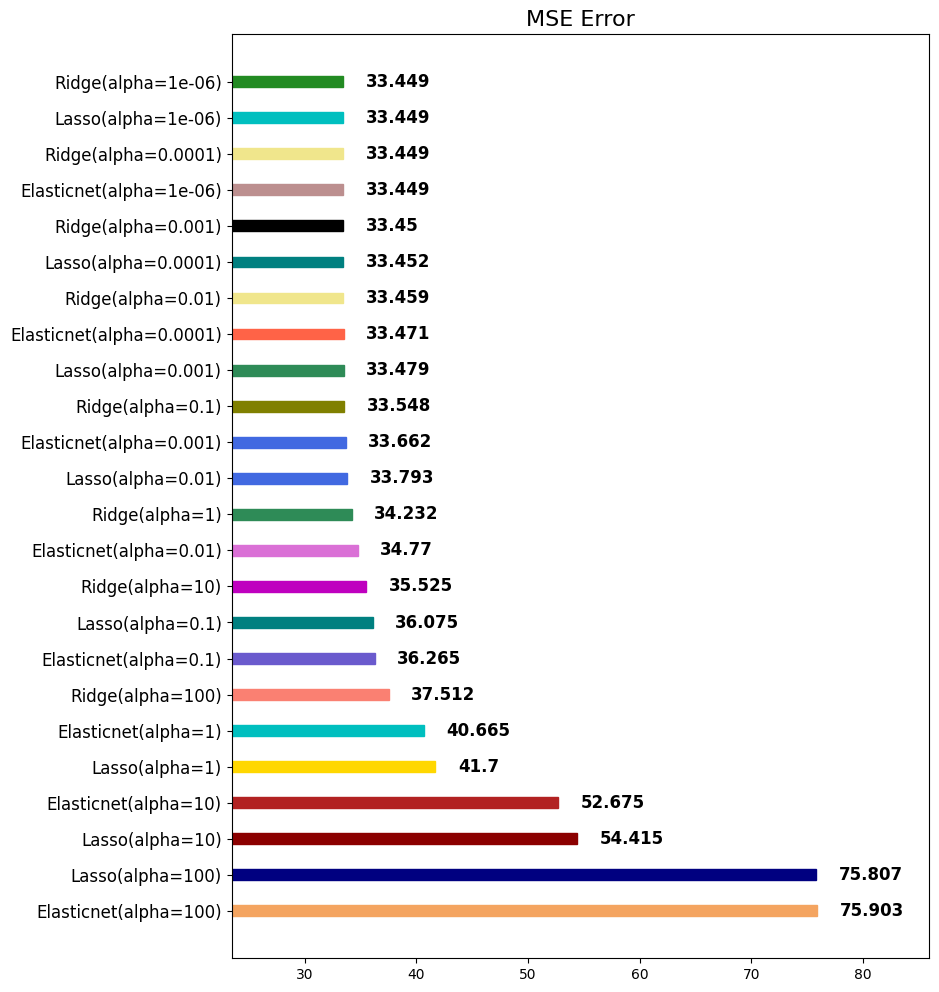

In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© (L1 + L2 Ï†ïÍ∑úÌôî)
# alpha Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ï†ïÍ∑úÌôî Í∞ïÎèÑÍ∞Ä Ïª§Ïßê (Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†• Ï¶ùÍ∞Ä)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # Îã§ÏñëÌïú alpha Í∞í ÏÑ§Ï†ï
for alpha in alphas:
    Elasticnet = ElasticNet(alpha=alpha, random_state=111)  # ElasticNet Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    Elasticnet.fit(X_train, y_train)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌõàÎ†®
    pred_elastic = Elasticnet.predict(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
    add_model('Elasticnet(alpha={})'.format(alpha), pred_elastic, y_test)  

# Î™®Îì† Î™®Îç∏Ïùò ÏÑ±Îä• ÎπÑÍµê Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plot_all()  

## **7-4. Ridge vs Lasso vs Elasticnet Regression**

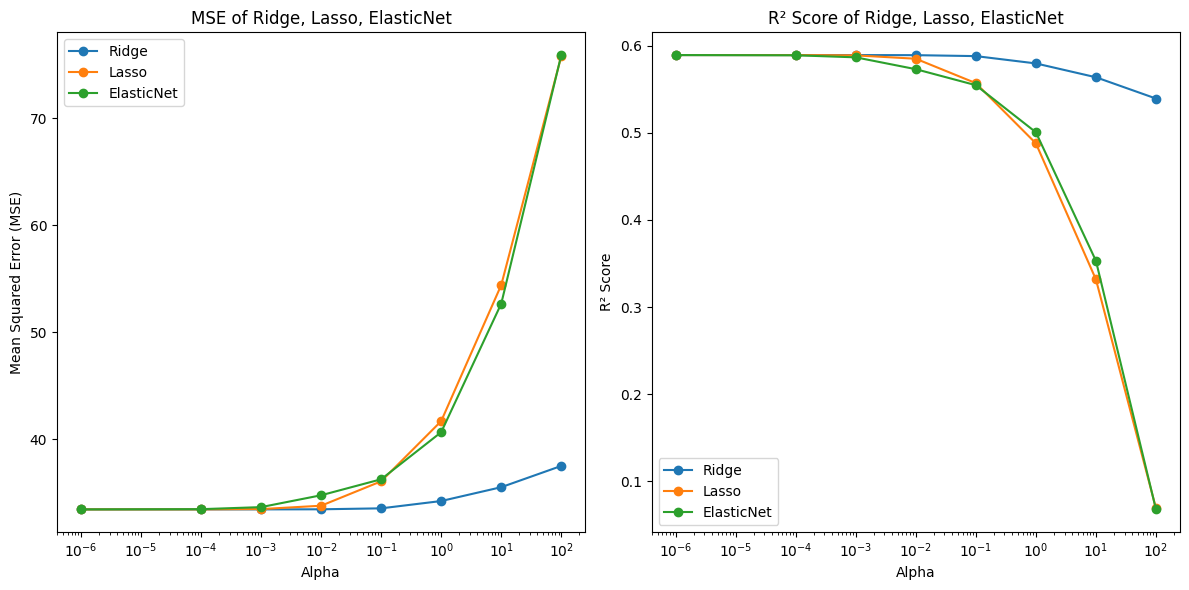

In [ ]:
# ÏÑ∏ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
ridge_results = []  # Ridge Î™®Îç∏ Í≤∞Í≥º Ï†ÄÏû•
lasso_results = []  # Lasso Î™®Îç∏ Í≤∞Í≥º Ï†ÄÏû•
elasticnet_results = []  # ElasticNet Î™®Îç∏ Í≤∞Í≥º Ï†ÄÏû•

# Ridge Î™®Îç∏ ÌèâÍ∞Ä
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=331)  # Ridge Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    ridge.fit(X_train, y_train)  # Î™®Îç∏ ÌïôÏäµ
    pred_ridge = ridge.predict(X_test)  # ÏòàÏ∏°Í∞í ÏÉùÏÑ±
    mse_ridge = mean_squared_error(y_test, pred_ridge)  # MSE Í≥ÑÏÇ∞
    r2_ridge = r2_score(y_test, pred_ridge)  # R¬≤ Í≥ÑÏÇ∞
    ridge_results.append((alpha, mse_ridge, r2_ridge))  # Í≤∞Í≥º Ï†ÄÏû•

# Lasso Î™®Îç∏ ÌèâÍ∞Ä
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=111)  # Lasso Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    lasso.fit(X_train, y_train)  # Î™®Îç∏ ÌïôÏäµ
    pred_lasso = lasso.predict(X_test)  # ÏòàÏ∏°Í∞í ÏÉùÏÑ±
    mse_lasso = mean_squared_error(y_test, pred_lasso)  # MSE Í≥ÑÏÇ∞
    r2_lasso = r2_score(y_test, pred_lasso)  # R¬≤ Í≥ÑÏÇ∞
    lasso_results.append((alpha, mse_lasso, r2_lasso))  # Í≤∞Í≥º Ï†ÄÏû•

# ElasticNet Î™®Îç∏ ÌèâÍ∞Ä
for alpha in alphas:
    elasticnet = ElasticNet(alpha=alpha, random_state=111)  # ElasticNet Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    elasticnet.fit(X_train, y_train)  # Î™®Îç∏ ÌïôÏäµ
    pred_elastic = elasticnet.predict(X_test)  # ÏòàÏ∏°Í∞í ÏÉùÏÑ±
    mse_elastic = mean_squared_error(y_test, pred_elastic)  # MSE Í≥ÑÏÇ∞
    r2_elastic = r2_score(y_test, pred_elastic)  # R¬≤ Í≥ÑÏÇ∞
    elasticnet_results.append((alpha, mse_elastic, r2_elastic))  # Í≤∞Í≥º Ï†ÄÏû•

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))

# MSE ÏãúÍ∞ÅÌôî
plt.subplot(1, 2, 1)
plt.plot(alphas, [x[1] for x in ridge_results], label='Ridge', marker='o')  # Ridge MSE
plt.plot(alphas, [x[1] for x in lasso_results], label='Lasso', marker='o')  # Lasso MSE
plt.plot(alphas, [x[1] for x in elasticnet_results], label='ElasticNet', marker='o')  # ElasticNet MSE
plt.xscale('log')  # xÏ∂ïÏùÑ Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÏÑ§Ï†ï
plt.xlabel('Alpha')  # xÏ∂ï ÎùºÎ≤®
plt.ylabel('Mean Squared Error (MSE)')  # yÏ∂ï ÎùºÎ≤®
plt.title('MSE of Ridge, Lasso, ElasticNet')  # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.legend()  # Î≤îÎ°Ä

# R¬≤ ÏãúÍ∞ÅÌôî
plt.subplot(1, 2, 2)
plt.plot(alphas, [x[2] for x in ridge_results], label='Ridge', marker='o')  # Ridge R¬≤
plt.plot(alphas, [x[2] for x in lasso_results], label='Lasso', marker='o')  # Lasso R¬≤
plt.plot(alphas, [x[2] for x in elasticnet_results], label='ElasticNet', marker='o')  # ElasticNet R¬≤
plt.xscale('log')  # xÏ∂ïÏùÑ Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÏÑ§Ï†ï
plt.xlabel('Alpha')  # xÏ∂ï ÎùºÎ≤®
plt.ylabel('R¬≤ Score')  # yÏ∂ï ÎùºÎ≤®
plt.title('R¬≤ Score of Ridge, Lasso, ElasticNet')  # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.legend()  # Î≤îÎ°Ä

plt.tight_layout()  # Í∑∏ÎûòÌîÑ Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()  # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

# <img src="../images/emergency.png" width="40" height="40"> **ÏΩîÎìú Ïã§Ïäµ ÏãúÍ∞Ñ - Ï†ïÍ∑úÌôî** 

## **1) Ridge Regression**

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ëÎ≥µ Ï†úÍ±∞

# ÏôÄÏù∏ ÌíàÏßà Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data_wine = pd.read_csv('../data/winequality-red.csv')

# Ï§ëÎ≥µÎêú ÌñâÏùò Í∞úÏàò ÌôïÏù∏
data_wine.duplicated().sum()

# Ï§ëÎ≥µ Ï†úÍ±∞
clean_wine = data_wine.copy()  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨
clean_wine.drop_duplicates(subset=None, inplace=True)  # Ï§ëÎ≥µÎêú Ìñâ Ï†úÍ±∞

# ÎèÖÎ¶Ω Î≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò(y) Ï†ïÏùò
X_wine = clean_wine.drop('quality', axis=1)  # 'quality' Ïó¥ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïó¥ÏùÑ ÎèÖÎ¶Ω Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©
y_wine = clean_wine['quality']  # 'quality' Ïó¥ÏùÑ Ï¢ÖÏÜç Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ (80:20 ÎπÑÏú®)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=0
)
# test_size=0.2: Îç∞Ïù¥ÌÑ∞Ïùò 20%Î•º ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©
# random_state=0: Í≤∞Í≥º Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÏãúÎìú ÏÑ§Ï†ï

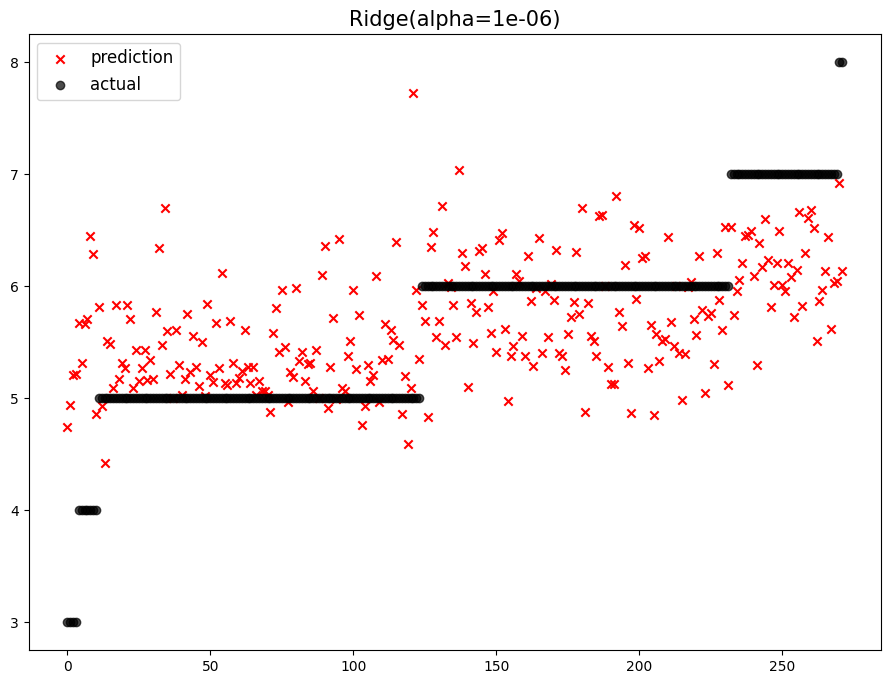

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1           Lasso(alpha=100)  75.806540
2            Lasso(alpha=10)  54.414927
3       Elasticnet(alpha=10)  52.674840
4             Lasso(alpha=1)  41.700097
5        Elasticnet(alpha=1)  40.665332
6      Elasticnet(alpha=0.1)  36.264654
7           Lasso(alpha=0.1)  36.074853
8     Elasticnet(alpha=0.01)  34.769967
9          Lasso(alpha=0.01)  33.792934
10   Elasticnet(alpha=0.001)  33.662437
11        Lasso(alpha=0.001)  33.479018
12  Elasticnet(alpha=0.0001)  33.470712
13       Lasso(alpha=0.0001)  33.451935
14   Elasticnet(alpha=1e-06)  33.449197
15        Lasso(alpha=1e-06)  33.449009
16          Ridge(alpha=100)   0.579898
17           Ridge(alpha=10)   0.542719
18        Ridge(alpha=1e-06)   0.536892
19       Ridge(alpha=0.0001)   0.536692
20            Ridge(alpha=1)   0.536264
21        Ridge(alpha=0.001)   0.536112
22         Ridge(alpha=0.01)   0.535807
23          Ridge(alpha=0.1)   0.535762


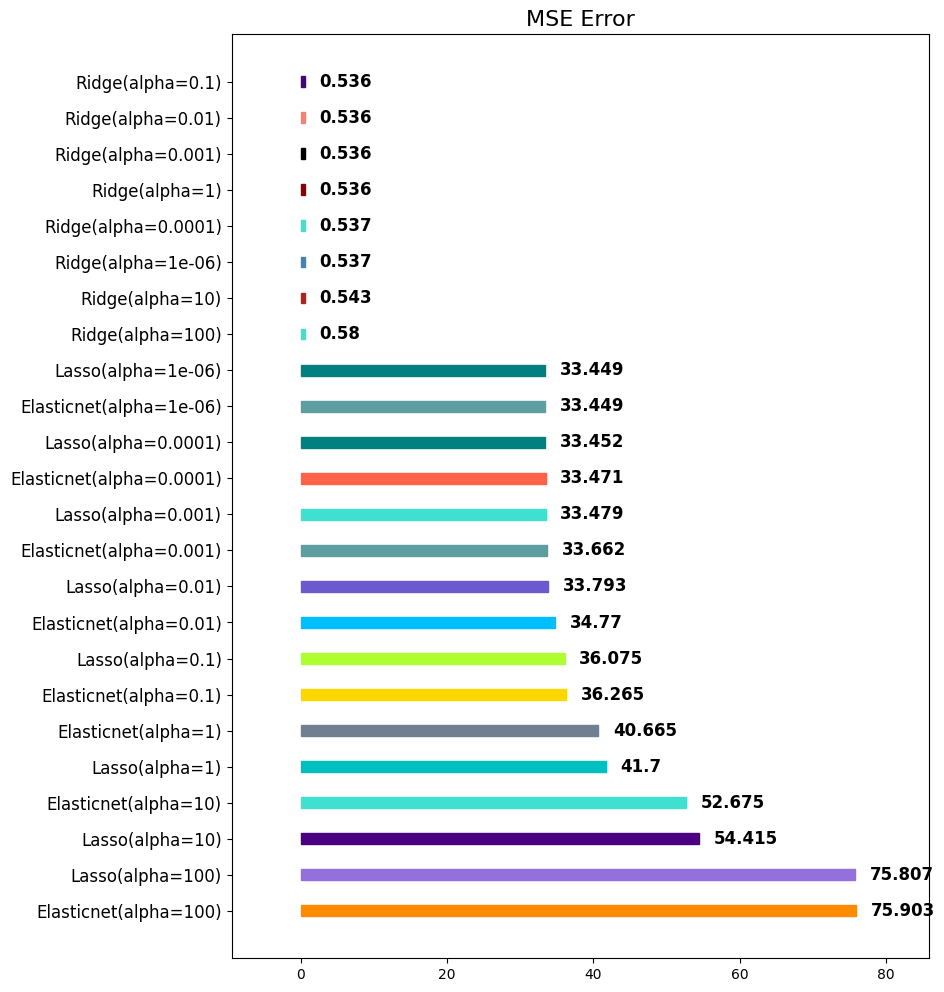

In [ ]:
from sklearn.linear_model import Ridge

# Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌÅ∞ ÏùºÎ∞òÌôî
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    ridge_test = {___}(alpha=alpha, random_state=331)
    ridge_test.{___}
    pred_ridge_test = {___}
    add_model2('Ridge(alpha={})'.format(alpha), pred_ridge_test, y_test_wine)
plot_all2()

## **2) Lasso Regression**

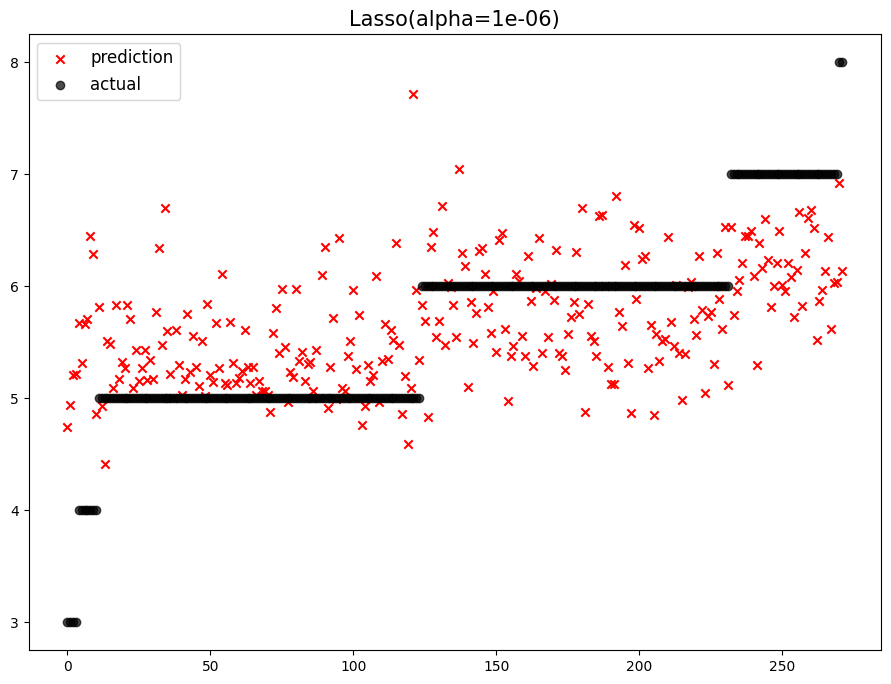

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1       Elasticnet(alpha=10)  52.674840
2        Elasticnet(alpha=1)  40.665332
3      Elasticnet(alpha=0.1)  36.264654
4     Elasticnet(alpha=0.01)  34.769967
5    Elasticnet(alpha=0.001)  33.662437
6   Elasticnet(alpha=0.0001)  33.470712
7    Elasticnet(alpha=1e-06)  33.449197
8             Lasso(alpha=1)   0.717310
9           Lasso(alpha=100)   0.693310
10           Lasso(alpha=10)   0.693310
11          Lasso(alpha=0.1)   0.613420
12          Ridge(alpha=100)   0.579898
13         Lasso(alpha=0.01)   0.543669
14           Ridge(alpha=10)   0.542719
15        Ridge(alpha=1e-06)   0.536892
16        Lasso(alpha=1e-06)   0.536756
17       Ridge(alpha=0.0001)   0.536692
18            Ridge(alpha=1)   0.536264
19        Ridge(alpha=0.001)   0.536112
20         Ridge(alpha=0.01)   0.535807
21          Ridge(alpha=0.1)   0.535762
22       Lasso(alpha=0.0001)   0.535448
23        Lasso(alpha=0.001)   0.533793


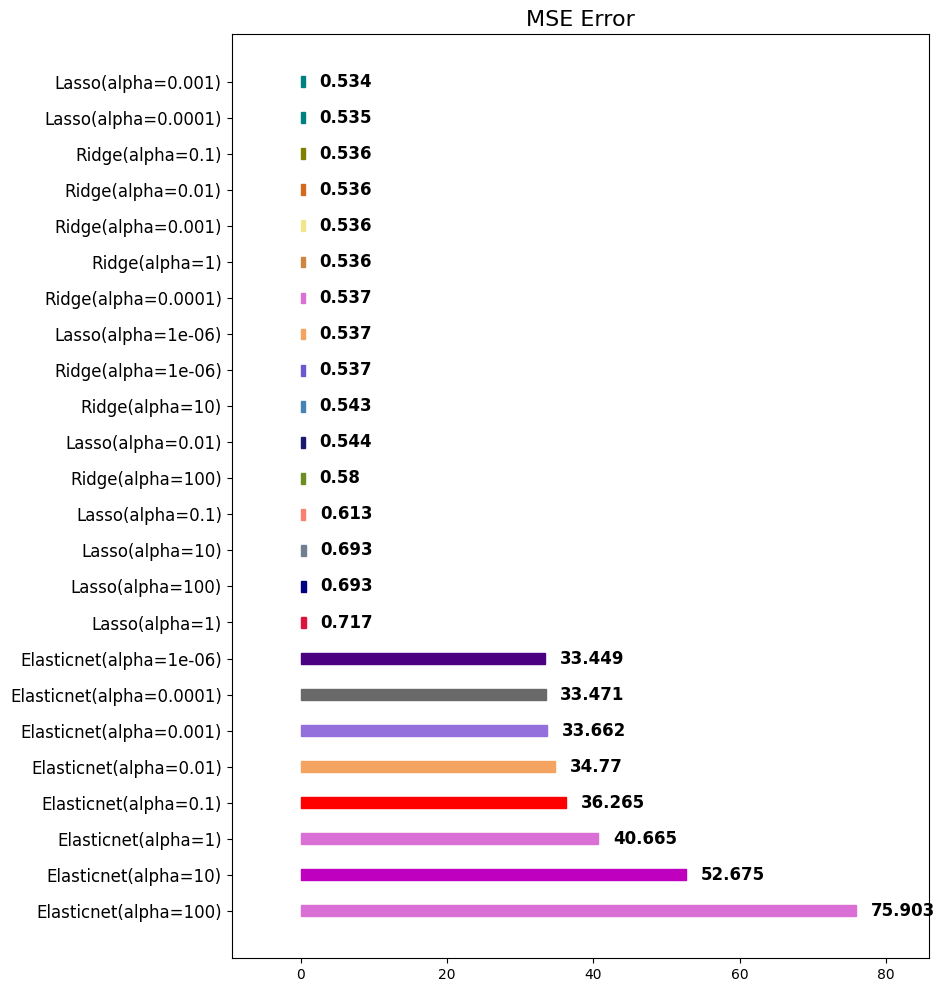

In [ ]:
from sklearn.linear_model import Lasso

# Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌÅ∞ ÏùºÎ∞òÌôî
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    lasso_test = {___}(alpha=alpha, random_state=111)
    lasso_test.{___}
    pred_lasso_test = {___}
    add_model2('Lasso(alpha={})'.format(alpha), pred_lasso_test, y_test_wine)
plot_all2()

## **3) Elasticnet Regression**

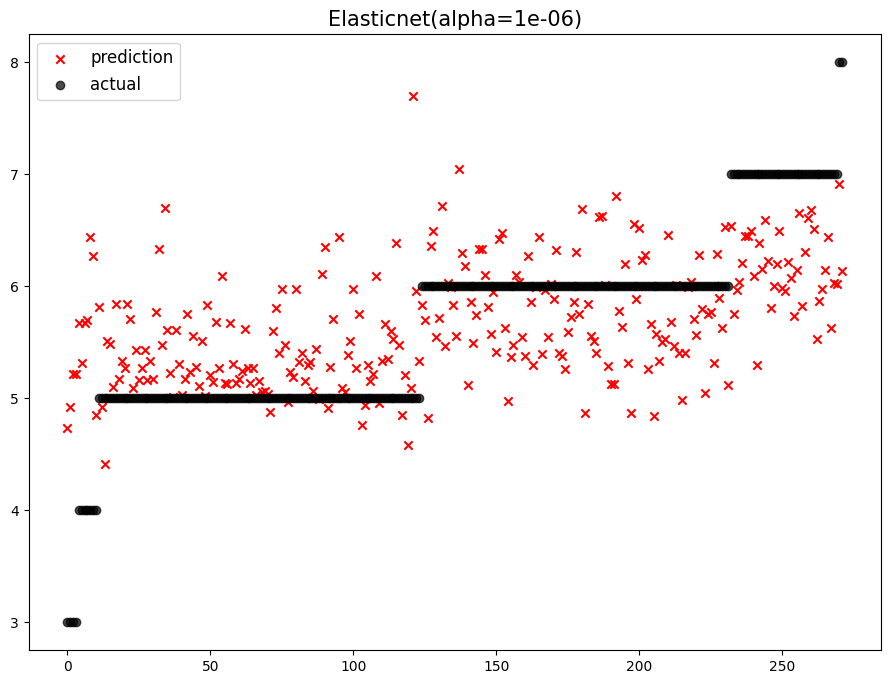

                       model       mse
0        Elasticnet(alpha=1)  0.723298
1             Lasso(alpha=1)  0.717310
2           Lasso(alpha=100)  0.693310
3            Lasso(alpha=10)  0.693310
4      Elasticnet(alpha=100)  0.693310
5       Elasticnet(alpha=10)  0.692950
6           Lasso(alpha=0.1)  0.613420
7      Elasticnet(alpha=0.1)  0.611283
8           Ridge(alpha=100)  0.579898
9          Lasso(alpha=0.01)  0.543669
10    Elasticnet(alpha=0.01)  0.543369
11           Ridge(alpha=10)  0.542719
12        Ridge(alpha=1e-06)  0.536892
13        Lasso(alpha=1e-06)  0.536756
14       Ridge(alpha=0.0001)  0.536692
15            Ridge(alpha=1)  0.536264
16   Elasticnet(alpha=1e-06)  0.536246
17        Ridge(alpha=0.001)  0.536112
18         Ridge(alpha=0.01)  0.535807
19          Ridge(alpha=0.1)  0.535762
20  Elasticnet(alpha=0.0001)  0.535603
21       Lasso(alpha=0.0001)  0.535448
22   Elasticnet(alpha=0.001)  0.535105
23        Lasso(alpha=0.001)  0.533793


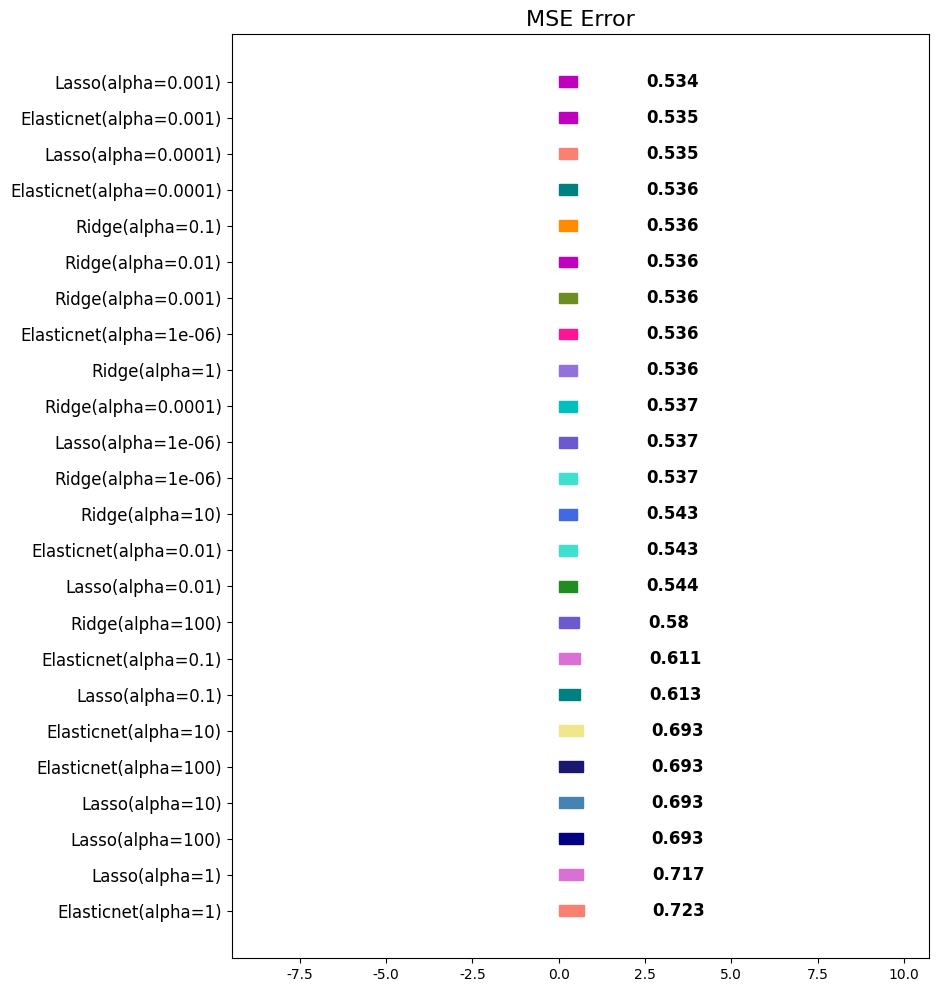

In [ ]:
from sklearn.linear_model import ElasticNet

# Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌÅ∞ ÏùºÎ∞òÌôî
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    Elasticnet_test = {___}(alpha=alpha, random_state=111)
    Elasticnet_test.{___}
    pred_elastic_test = {___}
    add_model2('Elasticnet(alpha={})'.format(alpha), pred_elastic_test, y_test_wine)
plot_all2()